In [222]:
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
df_ranking = pd.read_csv("ranking.csv")

## Análise exploratória

In [224]:
df_ranking.shape

(210342, 13)

In [225]:
df_ranking.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

In [226]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210342 entries, 0 to 210341
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        210342 non-null  int64  
 1   LEAGUE_ID      210342 non-null  int64  
 2   SEASON_ID      210342 non-null  int64  
 3   STANDINGSDATE  210342 non-null  object 
 4   CONFERENCE     210342 non-null  object 
 5   TEAM           210342 non-null  object 
 6   G              210342 non-null  int64  
 7   W              210342 non-null  int64  
 8   L              210342 non-null  int64  
 9   W_PCT          210342 non-null  float64
 10  HOME_RECORD    210342 non-null  object 
 11  ROAD_RECORD    210342 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.9+ MB


In [227]:
df_ranking.head(10)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
5,1610612758,0,22022,2022-12-22,West,Sacramento,30,17,13,0.567,9-5,8-8,NaN
6,1610612762,0,22022,2022-12-22,West,Utah,35,19,16,0.543,12-5,7-11,NaN
7,1610612757,0,22022,2022-12-22,West,Portland,32,17,15,0.531,7-6,10-9,NaN
8,1610612742,0,22022,2022-12-22,West,Dallas,32,16,16,0.500,12-5,4-11,NaN
9,1610612750,0,22022,2022-12-22,West,Minnesota,32,16,16,0.500,9-8,7-8,NaN


In [228]:
df_ranking.value_counts('CONFERENCE')

CONFERENCE
East    105358
West    104984
Name: count, dtype: int64

In [229]:
df_ranking.isnull().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     206352
dtype: int64

O data set tem 210342 linhas e 13 colunas, sendo elas:

- `TEAM_ID`: Identificador único do time (inteiro).
- `LEAGUE_ID`: Identificador da liga (inteiro).
- `SEASON_ID`: Identificador da temporada (inteiro).
- `STANDINGSDATE`: Data do registro do ranking/posição (string, formato de data).
- `CONFERENCE`: Conferência à qual o time pertence (string, "West" ou "East").
- `TEAM`: Nome do time (string).
- `G`: Número de jogos disputados até a data (inteiro).
- `W`: Número de vitórias até a data (inteiro).
- `L`: Número de derrotas até a data (inteiro).
- `W_PCT`: Percentual de vitórias até a data (float).
- `HOME_RECORD`: Desempenho em casa no formato "vitórias-derrotas" (string).
- `ROAD_RECORD`: Desempenho fora de casa no formato "vitórias-derrotas" (string).
- `RETURNTOPLAY`: Informação sobre retorno ao jogo (float, geralmente nulo).

## Simplificão do dataset

In [230]:
columns_to_keep = ['TEAM_ID', 'SEASON_ID', 'STANDINGSDATE', 'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD']
df_ranking_smp = df_ranking[columns_to_keep].copy()
df_ranking_smp = df_ranking_smp[df_ranking_smp['SEASON_ID'] >= 22010].copy()
df_ranking_smp

,TEAM_ID,SEASON_ID,STANDINGSDATE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612743,22022,2022-12-22,Denver,30,19,11,0.633,10-3,9-8
1,1610612763,22022,2022-12-22,Memphis,30,19,11,0.633,13-2,6-9
2,1610612740,22022,2022-12-22,New Orleans,31,19,12,0.613,13-4,6-8
3,1610612756,22022,2022-12-22,Phoenix,32,19,13,0.594,14-4,5-9
4,1610612746,22022,2022-12-22,LA Clippers,33,19,14,0.576,11-7,8-7
...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,22013,2014-09-01,Detroit,82,29,53,0.354,17-24,12-29
210338,1610612738,22013,2014-09-01,Boston,82,25,57,0.305,16-25,9-32
210339,1610612753,22013,2014-09-01,Orlando,82,23,59,0.280,19-22,4-37
210340,1610612755,22013,2014-09-01,Philadelphia,82,19,63,0.232,10-31,9-32


Criou-se um dataset simplificado (`df_ranking_smp`) com apenas as colunas relevantes para a análise com dados relativos às temporadas de 2010 e mais recentes.

## Definição dos times

In [231]:
df_ranking_smp.value_counts('TEAM')

TEAM
Charlotte        4203
Dallas           4203
Boston           4202
Golden State     4202
Houston          4202
Memphis          4202
New York         4202
Milwaukee        4202
Oklahoma City    4202
Miami            4201
Denver           4201
Chicago          4201
Indiana          4200
Cleveland        4200
Atlanta          4200
Detroit          4200
San Antonio      4200
Phoenix          4200
Portland         4200
L.A. Lakers      4200
New Orleans      4200
Minnesota        4200
Orlando          4200
Philadelphia     4200
Utah             4200
Toronto          4200
Washington       4200
Sacramento       4200
Brooklyn         3499
LA Clippers      2480
L.A. Clippers    1720
New Jersey        701
Name: count, dtype: int64

In [232]:
team_1 = 'L.A. Lakers'
team_2 = 'Golden State'

In [233]:
df_team_1 = df_ranking_smp[df_ranking_smp['TEAM'] == team_1].copy()
df_team_2 = df_ranking_smp[df_ranking_smp['TEAM'] == team_2].copy()

In [234]:
df_team_1

,TEAM_ID,SEASON_ID,STANDINGSDATE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
12,1610612747,22022,2022-12-22,L.A. Lakers,31,13,18,0.419,8-7,5-11
27,1610612747,22022,2022-12-21,L.A. Lakers,31,13,18,0.419,8-7,5-11
41,1610612747,22022,2022-12-20,L.A. Lakers,30,13,17,0.433,8-7,5-10
56,1610612747,22022,2022-12-19,L.A. Lakers,30,13,17,0.433,8-7,5-10
71,1610612747,22022,2022-12-18,L.A. Lakers,29,13,16,0.448,8-7,5-9
...,...,...,...,...,...,...,...,...,...,...
121675,1610612747,22013,2014-09-05,L.A. Lakers,82,27,55,0.329,14-27,13-28
121690,1610612747,22013,2014-09-04,L.A. Lakers,82,27,55,0.329,14-27,13-28
121705,1610612747,22013,2014-09-03,L.A. Lakers,82,27,55,0.329,14-27,13-28
121720,1610612747,22013,2014-09-02,L.A. Lakers,82,27,55,0.329,14-27,13-28


In [235]:
df_team_2

,TEAM_ID,SEASON_ID,STANDINGSDATE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
10,1610612744,22022,2022-12-22,Golden State,33,15,18,0.455,12-2,3-16
25,1610612744,22022,2022-12-21,Golden State,33,15,18,0.455,12-2,3-16
40,1610612744,22022,2022-12-20,Golden State,32,15,17,0.469,12-2,3-15
55,1610612744,22022,2022-12-19,Golden State,31,15,16,0.484,12-2,3-14
70,1610612744,22022,2022-12-18,Golden State,31,15,16,0.484,12-2,3-14
...,...,...,...,...,...,...,...,...,...,...
121667,1610612744,22013,2014-09-05,Golden State,82,51,31,0.622,27-14,24-17
121682,1610612744,22013,2014-09-04,Golden State,82,51,31,0.622,27-14,24-17
121697,1610612744,22013,2014-09-03,Golden State,82,51,31,0.622,27-14,24-17
121712,1610612744,22013,2014-09-02,Golden State,82,51,31,0.622,27-14,24-17


In [236]:

df_team_1_overall_performace = df_team_1.sort_values('STANDINGSDATE').groupby('SEASON_ID').tail(1)
df_team_1_overall_performace = df_team_1_overall_performace[['SEASON_ID', 'W_PCT']].sort_values('SEASON_ID')

df_team_2_overall_performace = df_team_2.sort_values('STANDINGSDATE').groupby('SEASON_ID').tail(1)
df_team_2_overall_performace = df_team_2_overall_performace[['SEASON_ID', 'W_PCT']].sort_values('SEASON_ID')


#df_team_1_overall_performace.to_csv("df_team_1_overall_performace.csv", index=False)
#df_team_2_overall_performace.to_csv("df_team_2_overall_performace.csv", index=False)

In [237]:
df_team_1_overall_performace 

,SEASON_ID,W_PCT
48361,22010,0.695
43951,22011,0.621
38481,22012,0.549
121255,22013,0.329
115810,22014,0.256
110336,22015,0.207
104875,22016,0.317
99427,22017,0.427
93921,22018,0.451
22154,22019,0.732


In [238]:
df_team_2_overall_performace

,SEASON_ID,W_PCT
48370,22010,0.439
43961,22011,0.348
38479,22012,0.573
121247,22013,0.622
115797,22014,0.817
110322,22015,0.890
104862,22016,0.817
99418,22017,0.707
93912,22018,0.695
22168,22019,0.231


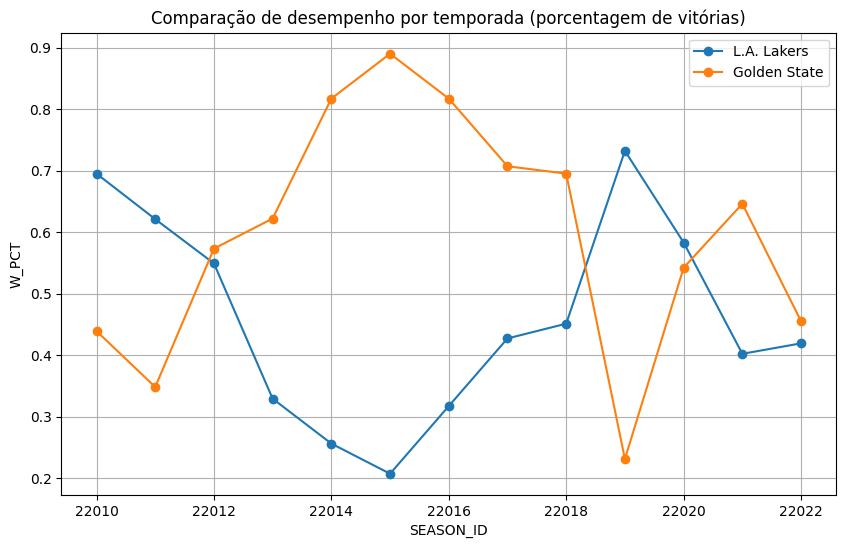

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_team_1_overall_performace['SEASON_ID'], df_team_1_overall_performace['W_PCT'], marker='o', label=team_1)
plt.plot(df_team_2_overall_performace['SEASON_ID'], df_team_2_overall_performace['W_PCT'], marker='o', label=team_2)
plt.xlabel('SEASON_ID')
plt.ylabel('W_PCT')
plt.title('Comparação de desempenho por temporada (porcentagem de vitórias)')
plt.legend()
plt.grid(True)
plt.show()


## Desempenho de cada time por temporada

## Outro título

## Tratamento
Me interessa apenas 
- O "ano" da participação do atleta
- A "equipe" do atleta 
- O "esporte" da participação
- A "medalha" conquitada pelo atleta

In [239]:
columns_to_keep = ['SEASON_ID', 'STANDINGSDATE', 'TEAM', 'W_PCT', 'G', 'W', 'L'] 

In [240]:
df_ranking_smp = df_ranking[columns_to_keep].copy()
df_ranking_smp

,SEASON_ID,STANDINGSDATE,TEAM,W_PCT,G,W,L
0,22022,2022-12-22,Denver,0.633,30,19,11
1,22022,2022-12-22,Memphis,0.633,30,19,11
2,22022,2022-12-22,New Orleans,0.613,31,19,12
3,22022,2022-12-22,Phoenix,0.594,32,19,13
4,22022,2022-12-22,LA Clippers,0.576,33,19,14
...,...,...,...,...,...,...,...
210337,22013,2014-09-01,Detroit,0.354,82,29,53
210338,22013,2014-09-01,Boston,0.305,82,25,57
210339,22013,2014-09-01,Orlando,0.280,82,23,59
210340,22013,2014-09-01,Philadelphia,0.232,82,19,63


In [241]:
df_ranking_smp['TEAM'].value_counts()

TEAM
Dallas                       7026
Memphis                      7025
Houston                      7025
Minnesota                    7025
Boston                       7025
Golden State                 7025
Washington                   7025
Milwaukee                    7025
New York                     7025
Denver                       7024
Miami                        7024
Chicago                      7024
Utah                         7023
Portland                     7023
L.A. Lakers                  7023
San Antonio                  7023
Phoenix                      7023
Sacramento                   7023
Detroit                      7023
Orlando                      7023
Toronto                      7023
Cleveland                    7023
Indiana                      7023
Atlanta                      7023
Philadelphia                 7023
Charlotte                    6649
New Orleans                  6345
Oklahoma City                5196
L.A. Clippers                4384
Brooklyn 

In [242]:
df_ranking_smp['STANDINGSDATE'].value_counts()

STANDINGSDATE
2020-12-28    38
2020-12-27    36
2020-12-29    35
2020-12-21    33
2020-12-20    33
              ..
2003-10-05    29
2003-10-06    29
2003-10-07    29
2003-10-08    29
2003-10-09    29
Name: count, Length: 7023, dtype: int64

In [243]:
df_ranking_smp['SEASON_ID'].value_counts()

SEASON_ID
22010    12480
22019    12240
22018    10470
22021    10380
22017    10380
22004    10260
22007    10230
22009    10230
22013    10200
22016    10200
22015    10200
22006    10200
22012    10200
22014    10170
22003    10150
22008    10140
22005    10140
22020     8573
22011     8550
22022     1980
12019      900
12009      780
12006      780
12015      750
12012      750
12013      720
12016      720
12007      720
12014      720
12008      690
12010      690
12003      667
12005      660
12004      630
12018      540
12022      540
12017      510
12021      480
12020      336
12011      270
22002      116
Name: count, dtype: int64

In [244]:
df_ranking_smp_lakers = df_ranking_smp[df_ranking_smp['TEAM'] == 'L.A. Lakers']
df_ranking_smp_lakers

,SEASON_ID,STANDINGSDATE,TEAM,W_PCT,G,W,L
12,22022,2022-12-22,L.A. Lakers,0.419,31,13,18
27,22022,2022-12-21,L.A. Lakers,0.419,31,13,18
41,22022,2022-12-20,L.A. Lakers,0.433,30,13,17
56,22022,2022-12-19,L.A. Lakers,0.433,30,13,17
71,22022,2022-12-18,L.A. Lakers,0.448,29,13,16
...,...,...,...,...,...,...,...
121675,22013,2014-09-05,L.A. Lakers,0.329,82,27,55
121690,22013,2014-09-04,L.A. Lakers,0.329,82,27,55
121705,22013,2014-09-03,L.A. Lakers,0.329,82,27,55
121720,22013,2014-09-02,L.A. Lakers,0.329,82,27,55


In [245]:
df_ranking_smp_lakers_last_hundred = df_ranking_smp_lakers.head(500)
df_ranking_smp_lakers_last_hundred

,SEASON_ID,STANDINGSDATE,TEAM,W_PCT,G,W,L
12,22022,2022-12-22,L.A. Lakers,0.419,31,13,18
27,22022,2022-12-21,L.A. Lakers,0.419,31,13,18
41,22022,2022-12-20,L.A. Lakers,0.433,30,13,17
56,22022,2022-12-19,L.A. Lakers,0.433,30,13,17
71,22022,2022-12-18,L.A. Lakers,0.448,29,13,16
...,...,...,...,...,...,...,...
13430,22020,2021-08-14,L.A. Lakers,0.583,72,42,30
13445,22020,2021-08-13,L.A. Lakers,0.583,72,42,30
13460,22020,2021-08-12,L.A. Lakers,0.583,72,42,30
13475,22020,2021-08-11,L.A. Lakers,0.583,72,42,30


In [246]:
df_ranking_smp_lakers_last_hundred.to_excel("df_ranking_smp_lakers_last_hundred.xlsx", index=False)
df_ranking_smp_lakers_last_hundred.to_csv("df_ranking_smp_lakers_last_hundred.csv", index=False)

In [247]:
team_name = 'L.A. Lakers'
df_team_1 = df_ranking[df_ranking['TEAM'] == team_name]

# Para cada temporada, pega o último registro (final da temporada)
df_team_1 = df_team_1.sort_values('STANDINGSDATE').groupby('SEASON_ID').tail(1)

# Extrai apenas a coluna W_PCT e a temporada
final_w_pct = final_season_stats[['SEASON_ID', 'W_PCT']].sort_values('SEASON_ID')
final_w_pct.to_csv("final_w_pct_team_1.csv", index=False)

In [248]:
train_seasons = [22017, 22018, 22019, 22020, 22021]
mean_pct = final_w_pct[final_w_pct['SEASON_ID'].isin(train_seasons)]['W_PCT'].mean()
print("Probabilidade média estimada:", mean_pct)

Probabilidade média estimada: 0.5642


In [249]:
team_name = 'Golden State'
team_df = df_ranking[df_ranking['TEAM'] == team_name]

# Para cada temporada, pega o último registro (final da temporada)
final_season_stats = team_df.sort_values('STANDINGSDATE').groupby('SEASON_ID').tail(1)

# Extrai apenas a coluna W_PCT e a temporada
final_w_pct = final_season_stats[['SEASON_ID', 'W_PCT']].sort_values('SEASON_ID')
final_w_pct.to_csv("final_w_pct_team_2.csv", index=False)

In [250]:
train_seasons = [22017, 22018, 22019, 22020, 22021]
mean_pct = final_w_pct[final_w_pct['SEASON_ID'].isin(train_seasons)]['W_PCT'].mean()
print("Probabilidade média estimada:", mean_pct)

Probabilidade média estimada: 0.5642
